In [1]:
import numpy as np
import numpy as np
import matplotlib.pyplot as plt
from codes.solvers import solver
from codes.tb import transforms, utils
from codes.model import Model
import codes.model
from codes.tb.tb import add_tb, scale_tb
from codes import mf
from codes import observables

In [2]:
def total_energy(ham_tb, rho_tb): 
    return np.real(observables.expectation_value(rho_tb, ham_tb))


In [3]:
U0 = 1
filling = 2

hopp = np.kron(np.array([[0, 1], [0, 0]]), np.eye(2))
h_0 = {(0,): hopp + hopp.T.conj(), (1,): hopp, (-1,): hopp.T.conj()}
h_int_U0 = {
        (0,): U0 * np.kron(np.eye(2), np.ones((2, 2))),
    }


def model_U(U):
    h_int = {
        (0,): U * np.kron(np.eye(2), np.ones((2, 2))),
    }
    return Model(h_0=h_0, h_int=h_int, filling=filling)

hop_vecs = model_U(U0).h_0.keys()

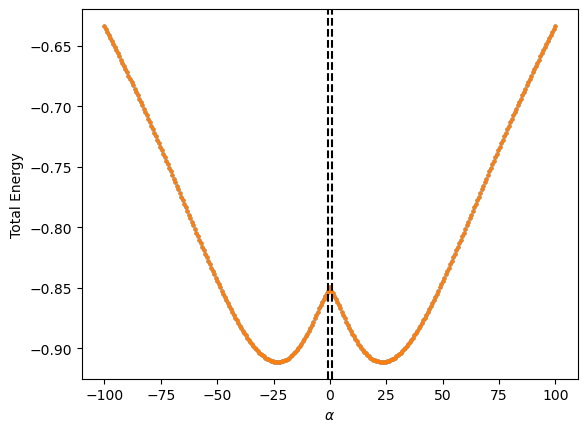

In [26]:
nk = 50
guess = utils.generate_guess(frozenset(h_int_U0), len(list(h_0.values())[0]))

def groundstate(U):
    _model = model_U(U)
    mf_sol = solver(_model, guess, nk=nk)
 
    return mf_sol

mf_sol_groundstate = groundstate(U0)

@np.vectorize
def mfRescaled(alpha, mf0=mf_sol_groundstate):
    hamiltonian = add_tb(h_0, scale_tb(mf0,alpha))
    rho, _ = codes.model.rho(hamiltonian, filling=2, nk=nk, ndim=1)
    hamiltonian = add_tb(h_0, scale_tb(mf0, np.sign(alpha)))
    return total_energy(hamiltonian, rho)

alphas = np.linspace(-100, 100, 301)
plt.plot(alphas, mfRescaled(alphas), 'o', ms=2)
plt.plot(-alphas, mfRescaled(alphas), 'o', ms=2)
plt.axvline(x=1, c="k", ls="--")
plt.axvline(x=-1, c="k", ls="--")
plt.ylabel("Total Energy")
plt.xlabel(r"$\alpha$")
# plt.ylim(-4.6, -4.5)
plt.show()

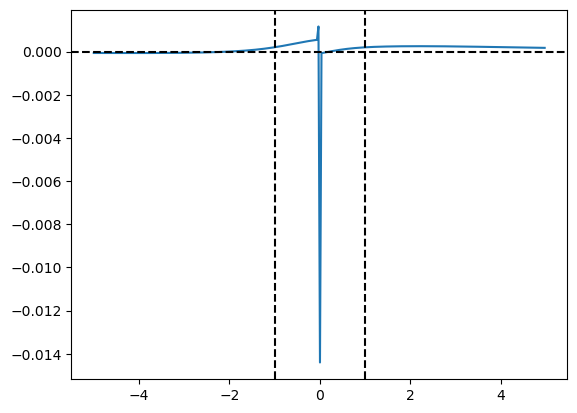

In [41]:
plt.plot(alphas[:-1], np.diff(mfRescaled(alphas)))
# plt.plot(-alphas[:-1], -np.diff(mfRescaled(alphas)))
plt.axhline(0, ls='--', c='k')
plt.axvline(x=1, c="k", ls="--")
plt.axvline(x=-1, c="k", ls="--")
# plt.ylim(-4, -2)
plt.show()